Total size of the features = 2
probability=0.992346, label=graffiti
probability=0.007654, label=not_graffiti
Total execution time: 0.13543105125427246 seconds
Total size of the features = 2
probability=0.513963, label=not_graffiti
probability=0.486037, label=graffiti
Total execution time: 0.09666299819946289 seconds
Total size of the features = 2
probability=0.579768, label=graffiti
probability=0.420232, label=not_graffiti
Total execution time: 0.09350705146789551 seconds
Total size of the features = 2
probability=0.711326, label=not_graffiti
probability=0.288674, label=graffiti
Total execution time: 0.10203313827514648 seconds
Total size of the features = 2
probability=0.616767, label=graffiti
probability=0.383233, label=not_graffiti
Total execution time: 0.10057401657104492 seconds
Total size of the features = 2
probability=0.879800, label=not_graffiti
probability=0.120200, label=graffiti
Total execution time: 0.09710288047790527 seconds
Total size of the features = 2
probability=0.9

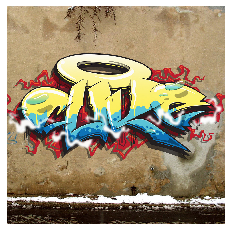

In [4]:
import mxnet as mx
import matplotlib.pyplot as plot
import cv2
import numpy as np
from mxnet.io import DataBatch
import time

net = mx.mod.Module.load('./image-classification', 8)
image_l = 256
image_w = 256
net.bind(for_training=False, data_shapes=[('data', (1, 3, image_l, image_w))], label_shapes=net._label_shapes)


def get_image(url, show=False):
    # download and show the image
    try:
        fname = mx.test_utils.download(url)
    except:
        fname = mx.test_utils.download(fname=url)
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
        return None
    if show:
        plot.imshow(img)
        plot.axis('off')
#         plot.show()
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (256, 256))
    img = np.swapaxes(img, 0, 2)
    # cv2.imwrite('compressed.png', img)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img


def predict(url, labels):
    start_time = time.time()

    img = get_image(url, show=True)
    # compute the predict probabilities
    net.forward(DataBatch([mx.nd.array(img)]))
    # net.forward(list([mx.nd.array(img)]))
    prob = net.get_outputs()[0].asnumpy()

    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]

    print("Total size of the features = %s" %(len(a)))
    for i in a[0:5]:
        print('probability=%f, label=%s' % (prob[i], labels[i]))

    # print('probability of graffiti=%f, i=%s' % (prob[0], labels[0]))
    # print('probability of non-graffiti=%f, i=%s' % (prob[1], labels[1]))
    end_time = time.time()
    print("Total execution time: {} seconds".format(end_time - start_time))


labels = ['graffiti', 'not_graffiti']
predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/GraffitiFeature.jpg', labels)
predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/download.jpeg', labels)
predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/Not_Graffiti_1.jpg', labels)
predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/Not_Graffiti_2.jpg', labels)
predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/2014-17-12-KORN1-e1418807468822.jpg', labels)
predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/15747100163591ad831fff30b2280ce04676c7f05c.jpg', labels)
predict('https://sagemaker-graffiti-images.s3.amazonaws.com/001.graffiti/7ae4ba68596667.5b625681347a6.jpg', labels)